In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) 

In [2]:
# 准备数据集，此处用随机的方式生成一些样本数据
amplitute=10
num_points=100
dataset_X=amplitute*np.random.rand(num_points,1)-0.5*amplitute
dataset_y=np.sinc(dataset_X).ravel()
dataset_y+=0.2*(0.5-np.random.rand(dataset_y.size))
print(dataset_X.shape)
print(dataset_y.shape)

(100, 1)
(100,)


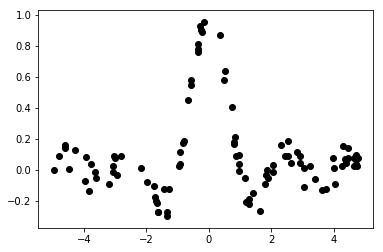

In [3]:
# 将数据集绘制到图表中看看分布情况
plt.scatter(dataset_X,dataset_y,color='k',marker='o')

In [4]:
# 构建KNN回归模型
from sklearn.neighbors import KNeighborsRegressor
K=8
KNN_regressor=KNeighborsRegressor(K,weights='distance')
KNN_regressor.fit(dataset_X,dataset_y)
predicted=KNN_regressor.predict(dataset_X)
print((dataset_y==predicted).all()) # 预测值和y值完全一样？？？怎么会这样？

True


In [5]:
# 将回归器绘制到图中
def plot_regressor(regressor, X, y):
    # 将数据集绘制到图表中看看分布情况
    plt.scatter(X,y,color='k',marker='o',label='dataset')
    predicted=regressor.predict(X)
    plt.scatter(X,predicted,color='blue',marker='x',label='predicted')
    plt.xlim(X.min() - 1, X.max() + 1)
    plt.ylim(y.min() - 0.2, y.max() + 0.2)
    plt.legend()
    plt.show()

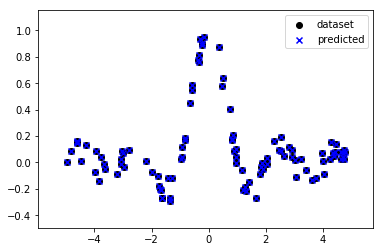

In [6]:
plot_regressor(KNN_regressor,dataset_X,dataset_y)

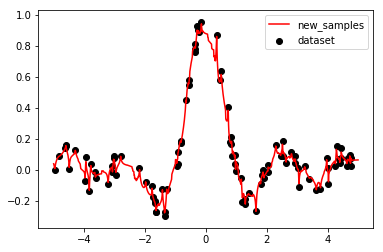

In [7]:
# 下面用本KNN回归器来预测新样本数据，如下
# 构建了10倍的新数据，并且建立第二个轴，用于KNNregressor.predict
new_samples=np.linspace(-0.5*amplitute, 0.5*amplitute, 10*num_points)[:, np.newaxis]
new_predicted=KNN_regressor.predict(new_samples)

# 把原始数据也画上来
plt.scatter(dataset_X,dataset_y,color='k',marker='o',label='dataset')
plt.plot(new_samples,new_predicted,color='r',linestyle='-',
         label='new_samples')
plt.legend()
